# Marketing A/B Testing

Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

- Would the campaign be successful?
- If the campaign was successful, how much of that success could be attributed to the ads?

With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

**Data dictionary:**

- Index: Row index
- user id: User ID (unique)
- test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- converted: If a person bought the product then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

In [7]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [8]:
os.chdir('c:\\Users\\Al-Amin\\Desktop\\Data_Analyst_Projects\\Python\\Marketing - AB Testing\\Data')

In [9]:
df = pd.read_csv('marketing_AB.csv')

In [10]:
df = df.drop(columns=['Unnamed: 0'], axis = 1)

In [11]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [12]:
# Checking for duplicate user ids
df['user id'].duplicated().sum()

# Removing user id from dataset, as it would not be useful in interpretating results

df = df.drop(columns = 'user id', axis =1)

In [13]:
df.describe()

,total ads,most ads hour
count,588101.000000,588101.000000
mean,24.820876,14.469061
std,43.715181,4.834634
min,1.000000,0.000000
25%,4.000000,11.000000
50%,13.000000,14.000000
75%,27.000000,18.000000
max,2065.000000,23.000000


In [14]:
df.shape

(588101, 5)

In [15]:
df.dtypes

test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

Looking at the dataset, we can see that most of the data is categorical, apart from total ads and most ads hour. However, most ads hour is based on time, which is cyclical in nature. Therefore, we can categorize it as a categorical feature instead of a numerical one.

In [16]:
cat_col = ['test group', 'converted', 'most ads day', 'most ads hour']

# Checking unique values for each column
for col in cat_col:
    unique_values = df[col].unique()
    print(f"'{col}': {unique_values}")

'test group': ['ad' 'psa']
'converted': [False  True]
'most ads day': ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
'most ads hour': [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


The results are in inline with what we expected. We can proceed gathering greater insight from the data.

## Data visuisualization

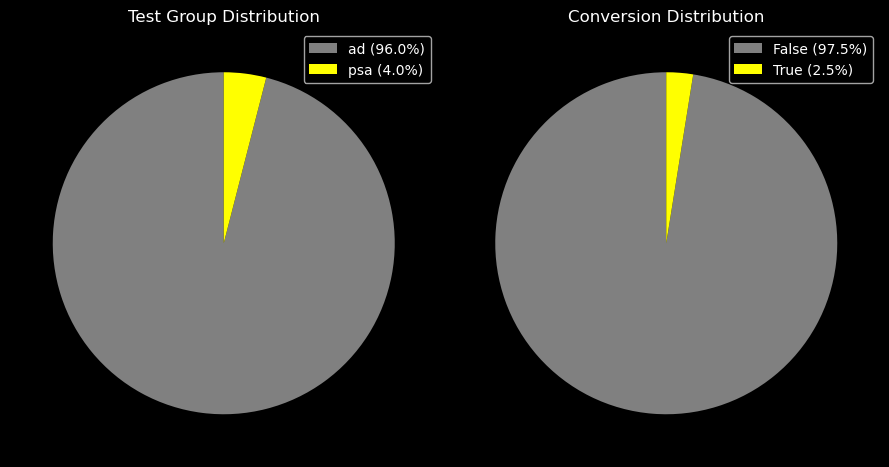

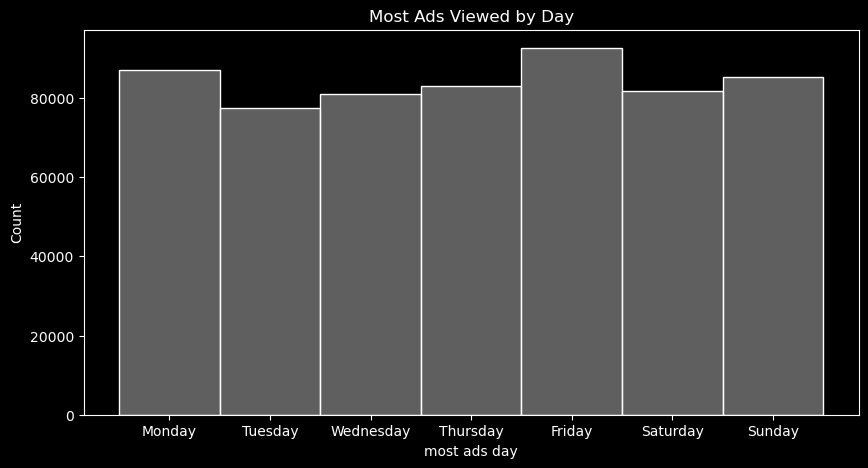

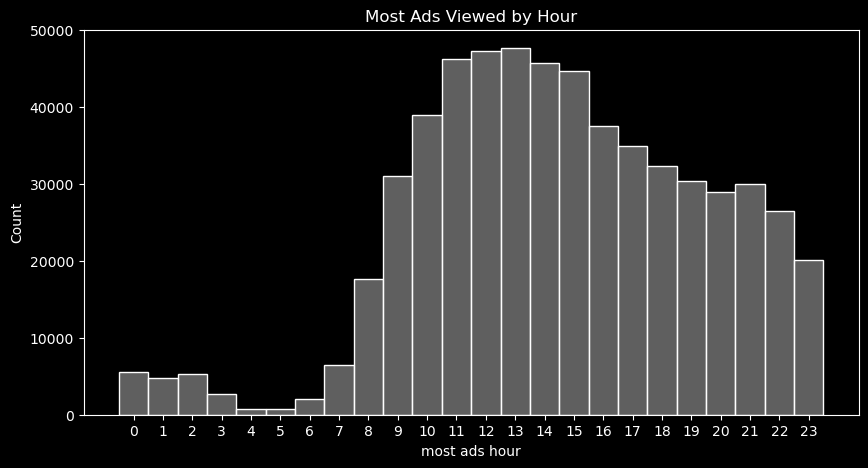

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

# Plot 1: Test Group
test_group_counts = df['test group'].value_counts()
axes[0].pie(test_group_counts, colors=['grey', 'yellow'], startangle = 90)
axes[0].set_title('Test Group Distribution')

total = sum(test_group_counts)
labels = [f'{label} ({count/total*100:.1f}%)' for label, count in zip(test_group_counts.index, test_group_counts)]
axes[0].legend(labels, loc="best")

# Plot 2: Converted
converted_counts = df['converted'].value_counts()
axes[1].pie(converted_counts, colors=['grey', 'yellow'], startangle=90)
axes[1].set_title('Conversion Distribution')

total = sum(converted_counts)
labels = [f'{label} ({count/total*100:.1f}%)' for label, count in zip(converted_counts.index, converted_counts)]
axes[1].legend(labels, loc="best")

plt.tight_layout()
plt.show()

# Plot 3: most ads day
plt.figure(figsize=(10, 5))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_sorted_days = df.copy()
df_sorted_days['most ads day'] = pd.Categorical(df_sorted_days['most ads day'], categories=day_order, ordered=True)
df_sorted_days = df_sorted_days.sort_values('most ads day')
sns.histplot(data=df_sorted_days, x='most ads day', discrete=True, color='grey')
plt.title('Most Ads Viewed by Day')
plt.show()

# Plot 4: most ads hour
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='most ads hour', discrete=True, color='grey', bins=24, binrange=(0, 23))
plt.title('Most Ads Viewed by Hour')
hour_ticks = range(24)
plt.xticks(hour_ticks, [f'{hour}' for hour in hour_ticks])

plt.show()

Test Group: This plot shows the number of users exposed to the ad versus the public service announcement (PSA). There are significantly more users in the ad group (96%) compared to the PSA group. This imbalance could potentailly lead to skewed results.

Conversion: This variable indicates whether users converted (made a purchase) or not. The majority of users (97.48%) did not convert, which is expected in marketing campaigns.

Most Ads Day: This distribution tells us the days when users saw the most ads. The distribution is relatively even across the days, with Friday being the day most users 
saw the most ads.

Most Ads Hour: Users viewed the most ads during 11:00 to 15:00, indicating greater engagement during these hours.

In [18]:
df['total ads'].describe().round(2)

count    588101.00
mean         24.82
std          43.72
min           1.00
25%           4.00
50%          13.00
75%          27.00
max        2065.00
Name: total ads, dtype: float64

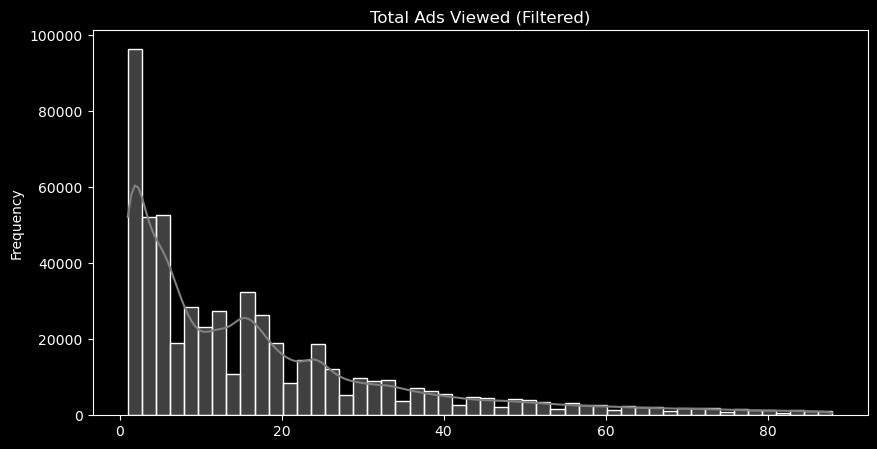

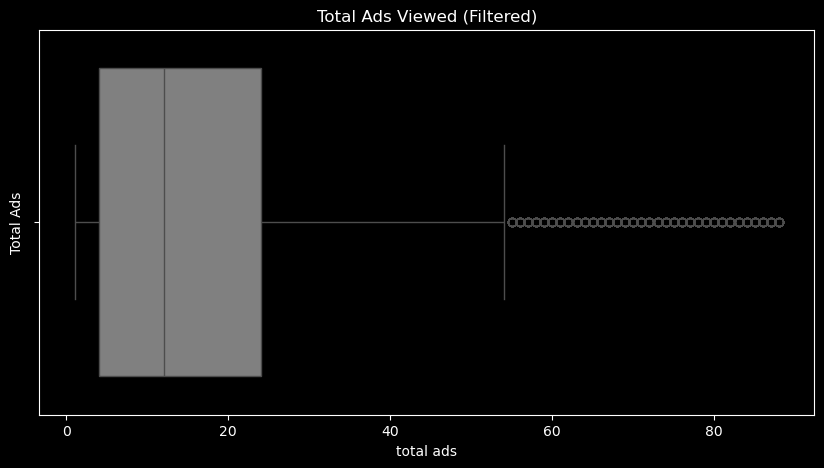

In [19]:
# Calculate the 95th percentile to filter extreme outliers
percentile_95 = df['total ads'].quantile(0.95)

# Filter the data to include only values below the 95th percentile
filtered_data = df[df['total ads'] <= percentile_95]

# Plot the histogram
plt.figure(figsize=(10, 5))
sns.histplot(filtered_data['total ads'], bins=50, kde=True, color = 'grey')
plt.title('Total Ads Viewed (Filtered)')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=filtered_data['total ads'], color = 'grey')
plt.title('Total Ads Viewed (Filtered)')
plt.ylabel('Total Ads')
plt.show()

Average Ads Viewed: On average, users were exposed to around 25 ads.

Distribution: The data is right-skewed, indicating that while most users saw a relatively small number of ads, a few were exposed to significantly more.

Outliers: The range extends up to 2,065 ads, highlighting the presence of significant outliers, although most users viewed fewer than 27 ads.

Histogram: The histogram illustrates that most users viewed a small number of ads, with the majority clustered at the lower end of the distribution. The KDE curve further emphasizes this skewness.

We can dive deeper by examining the relationships between different variables. 

Test Group vs. Converted: Whether users who saw the ad are more likely converted, compared to those who saw the PSA.

Most Ads Day vs. Converted: Whether conversions vary across different days of the week. This will help us to understand whether certain days are more effective in driving conversions.

Most Ads Hour vs. Converted: Whether the time of day when users viewed the most ads correlates with higher conversions.

Total Ads vs. Converted: How the number of ads viewed relates to whether a user converted. This will help us to understand whether higher ad exposure correlations with higher conversion rates.

To help us in our analysis, we will need to define the conversion rate. The conversion rate represents the percentage of users who completed a desired action—in this case, making a purchase—after viewing ads. It is calculated using the following formula:

Conversion Rate = (Number of Conversions (True) / Total Number of Users) * 100


In [20]:
conversion_rates = df.groupby('test group')['converted'].mean() * 100

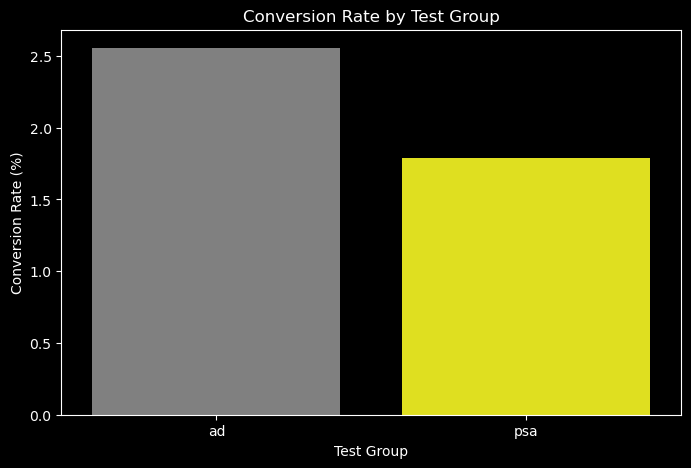

In [21]:
# Plot for Conversion Rate by Test Group 
plt.figure(figsize=(8, 5))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, hue=conversion_rates.index, palette=['grey', 'yellow'], legend=False)
plt.title('Conversion Rate by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate (%)')
plt.show()

The 'ad' group had a conversion rate of 2.62%, while the 'psa' group had a conversion rate of 1.82%. While this difference suggests that the ads were more effective than the PSA in driving conversions, the overall conversion rates look relatively low. Further analysis in the Statistical Testing will help us determine whether the difference is significant enough.

In [22]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

conversion_percentages = df.groupby('most ads day')['converted'].value_counts(normalize=True).unstack().reindex(day_order).round(4)*100
conversion_percentages

converted,False,True
most ads day,,
Monday,96.72,3.28
Tuesday,97.02,2.98
Wednesday,97.51,2.49
Thursday,97.84,2.16
Friday,97.78,2.22
Saturday,97.89,2.11
Sunday,97.55,2.45


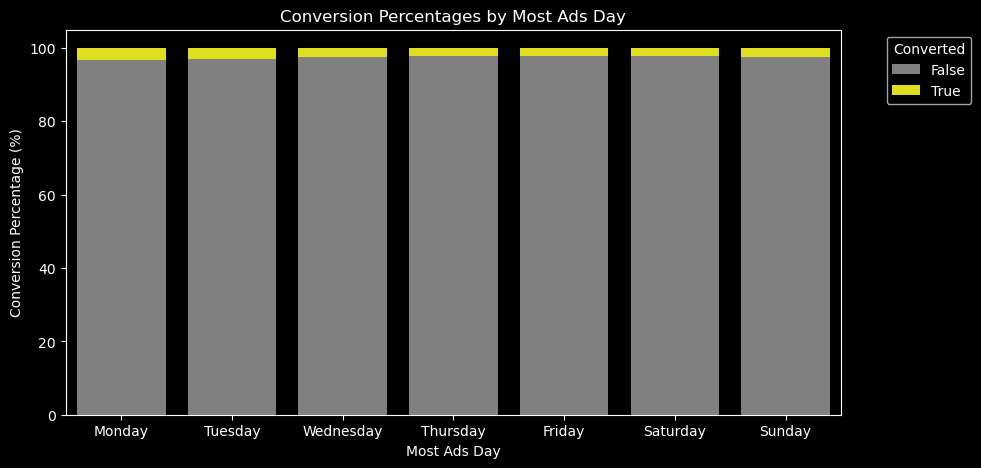

In [23]:
# Plotting Bar Chart for Most ads Day by Conversion
plt.figure(figsize=(10, 5))
sns.barplot(data=conversion_percentages.reset_index(), x='most ads day', y=False, color='grey', label='False')
sns.barplot(data=conversion_percentages.reset_index(), x='most ads day', y=True, color='yellow', label='True', bottom=conversion_percentages[False])

plt.title('Conversion Percentages by Most Ads Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Conversion Percentage (%)')
plt.legend(title='Converted', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

The grouped bar plot shows how conversions are distributed across different days of the week. Each bar represents 100% of the users for that specific day, with distinct colors indicating whether the users converted or not.

- While there is some variation in conversion rates by day, with certain days showing slightly higher rates, the differences are not pronounced.
- Based on the plot solely, this suggests that while the day of the week might have some influence, it may not be a major determining factor in conversion rates.
- However, we need to perform further analysis to confirm whether the specific day of the week has any effect on users' conversion after viewing ads.

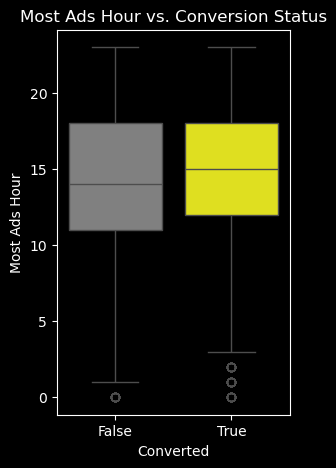

In [24]:
# Plotting box plots for Most ads hour by conversion status
plt.figure(figsize=(3, 5))
sns.boxplot(data=df, x='converted', y='most ads hour', hue = 'converted',  palette=['grey', 'yellow'], legend = False)
plt.title('Most Ads Hour vs. Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Most Ads Hour')
plt.show()

The box plot compares the time of day (hour) when users viewed the most ads, grouped by whether they converted or not.

- The distribution of viewing times is very similar between those who converted and those who did not, with the median hour and the spread (IQR) being almost identical for both groups.
- This substantial overlap suggests that the hour during which users viewed the most ads doesn’t significantly influence their likelihood of converting.

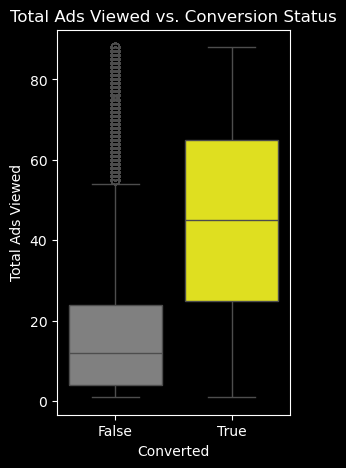

In [28]:
# Plot: Total Ads by concersion status
percentile_95_total_ads = df['total ads'].quantile(0.95)
filtered_df = df[df['total ads'] <= percentile_95_total_ads]

plt.figure(figsize=(3, 5))
sns.boxplot(data=filtered_df, x='converted', y='total ads', hue = 'converted', palette=['grey', 'yellow'], legend = False)
plt.title('Total Ads Viewed vs. Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Total Ads Viewed')
plt.show()

The box plot shows the distribution of total ads viewed for users who converted (True) versus those who did not (False).

- Users who have viewed a higher number of ads tend to purchase the product, as indicated by the median and the interquartile range (IQR) being noticeably higher compared to non-converted users.
- The spread of total ads viewed among non-converted users is wider, suggesting more variability in engagement levels.
- Despite the differences, there is still considerable overlap between the two groups, indicating that while viewing more ads might contribute to conversions, it may not be the sole determining factor.

## Statistical Testing 

For our statistical testing, we will focus on two tests: 

**Chi-Squared Test of Independence:** This test is appropriate for categorical data and can be used to assess whether the distribution of conversion status (converted or not) is independent of the test group (ad or PSA). The test will help us determine if the differences in conversion rates are statistically significant.

**Assumptions of Chi-Squared Test:**
- The data must be categorical (i.e., converted or not).
- Observations in each sample are independent and indeitcally distributed. 
- Expected valye of cells should be 5 or greater in at least 80% of cells.

**Mann-Whitney U Test:** Since we know that the distribution of conversions is likely skewed, the Mann-Whitney U test (also known as the Wilcoxon Rank-Sum Test), a non-parametric alternative to the t-test, can be used to compare the ranks of conversions between the 'ad' and 'psa' groups. This test does not assume normality and is particularly suitable given the imbalanced sample sizes.

**Assumptions of Mann-Whitney U Test:**

- Observations are independent.
- The data are ordinal or continuous and can be ranked.
- The two distributions have a similar shape (though they can have different medians).
- There are no ties, or ties are minimal.

We will set a confidence level of 95%. This would mean that we will be 95% confident that the results that we are observing are not due to random variation, and there is a 5% risk of concluding that an effect exists when there are none. 

In [31]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import norm

### Assessing the Impact of Advertisements on Conversions

 We will conduct hypothesis testing to determine whether the differences in conversions between users exposed to an advertisement and those shown a Public Service Announcement (PSA) are statistically significant. Given the imbalance in sample sizes and the nature of the data, both parametric and non-parametric tests are employed to ensure robust findings.

Hypotheses:

- **Null Hypothesis (H₀):** There is no difference in the conversion rates between the 'ad' and 'psa' groups. Any observed difference is due to random chance.
- **Alternative Hypothesis (H₁):** There is a difference in the conversion rates between the 'ad' and 'psa' groups, suggesting that the ad has an effect on conversions.
Given the binary nature of the conversion data (converted or not converted), we can consider two approaches:

To begin our analysis, we create a contingency table that summarizes the relationship between test group and converted. This table will help us understand the frequency distribution of conversions across test groups.

In [30]:
contigency_table_group = pd.crosstab(df['test group'], df['converted'])
contigency_table_group

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [35]:
# Checking the expected frequencies
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contigency_table_group)
expected_frequencies_group = pd.DataFrame(ex, index = contigency_table_group.index, columns = contigency_table_group.columns).round(2).sort_values(by = [True], ascending = False)
expected_frequencies_group

converted,False,True
test group,,
ad,550327.72,14249.28
psa,22930.28,593.72


The expected frequencies are greater than 5, therefore, the assumptions for the Chi-Squared tests are satisfied. We can now perform the Chi-Squared Test to determine if there is a statiscally significant relationship between `most ads days` and `converted`.

In [44]:
# Performing the test 

chi2_stat, p_val, dof, ex = stats.chi2_contingency(contigency_table_group)

print('Chi-Squared Statistic: ', chi2_stat.round(4))
print('P-value ', p_val)
print('Degrees of Freedom: ', dof)

alpha = 0.05 
if p_val < alpha:
    print("We reject the null hypothesis, indicating a statistically significant relationship between 'test group' and 'converted'.")
else:
    print("We fail to reject the null hypothesis, suggesting that there is not enough evidence to conclude a significant relationship between 'test group' and 'converted'.")

Chi-Squared Statistic:  54.0058
P-value  1.9989623063390075e-13
Degrees of Freedom:  1
We reject the null hypothesis, indicating a statistically significant relationship between 'test group' and 'converted'.


Since the p value is less than our chosen alpaha = 0.05. We can reject the null hypothesis. This indicates that the there is a statistically significant relationship between 'test group` and `converted`. 

However, it is essential to take into account the imbalance in both the test groups. To handle the imabalance, we will use the Mann-Whitney U test. 

In [45]:
# Separating the data into two groups: ad and psa
ad_group = df[df['test group'] == 'ad']['converted']
psa_group = df[df['test group'] == 'psa']['converted']

# Performing the Mann-Whitney U test
stat, p_value = mannwhitneyu(ad_group, psa_group)

print(f"Mann-Whitney U Statistic: {stat.round(4)}")
print(f"P-Value: {p_value}")

Mann-Whitney U Statistic: 6691636830.0
P-Value: 1.7053617930171878e-13


The Mann-Whitney U test confirms that there is a statistically significant difference between the conversion rates of the 'ad' and 'psa' groups. This supports the idea that the ads themselves potentially contribute to the success of the campaign, indicating that ad exposure can play a role in driving conversions more effectively than the PSA.

### Identifying Optimal Campaign Timing: Day of the Week Analysis


We will analyze the relationship between the day of the week when users viewed the most ads and their likelihood of converting. Understanding whether certain days are associated with higher conversion rates can help optimize the timing of ad campaigns.

We would like to determine if conversion rates vary significantly across different days of the week, identifying the optimal days for running ad campaigns. Specifically, we seek to answer:

- Are users more likely to convert on certain days of the week compared to others?

To explore whether users are more likely to convert on certain days, we will perform a Chi-Square test of independence to assess whether there is a significant relationship between these two categorical variables:

- most ads day: The day of the week when users viewed the most ads.
- converted: Whether or not the user converted (True or False).

In [47]:
# Creating a contingency table
contingency_table_day = pd.crosstab(df['most ads day'], df['converted']).sort_values(by=[True], ascending=False)
contingency_table_day

converted,False,True
most ads day,,
Monday,84216,2857
Tuesday,75167,2312
Sunday,83301,2090
Friday,90551,2057
Wednesday,78890,2018
Thursday,81192,1790
Saturday,79941,1719


In [48]:
 # Checking expected frequencies
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table_day)
expected_frequencies_day = pd.DataFrame(ex, index=contingency_table_day.index, columns=contingency_table_day.columns).round(2).sort_values(by=[True], ascending=False)
expected_frequencies_day

converted,False,True
most ads day,,
Friday,90270.68,2337.32
Monday,84875.38,2197.62
Sunday,83235.83,2155.17
Thursday,80887.63,2094.37
Saturday,79598.99,2061.01
Wednesday,78865.97,2042.03
Tuesday,75523.52,1955.48


In [51]:
# Performing the Chi-Square Test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table_day)

print(f"Chi-Square Statistic: {chi2_stat.round(4)}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")

# Interpretation of the p-value
alpha = 0.05
if p_val < alpha:
    print("The p-value is less than 0.05, indicating a significant relationship between 'most ads day' and 'converted'.")
else:
    print("The p-value is greater than 0.05, indicating no significant relationship between 'most ads day' and 'converted'.")

Chi-Square Statistic: 410.0479
P-Value: 1.9321843792446759e-85
Degrees of Freedom: 6
The p-value is less than 0.05, indicating a significant relationship between 'most ads day' and 'converted'.


There is a statistically significant relationship between most ads day and converted. This suggests that the day of the week when users viewed the most ads does influence the likelihood of conversion.

However, this analysis alone does not tell us which day(s) are the most effective for running campaigns. To determine this, we need to conduct further analysis by comparing the conversion status across different days of the week.

In [56]:
# Calculate conversion rates for each day
conversion_rates_day = contingency_table_day.div(contingency_table_day.sum(axis=1), axis=0) * 100

# Display conversion rates
print("Conversion Rates by Day:")
conversion_rates_percentage = (conversion_rates_day[True]).round(2).astype(str) + '%'
print(conversion_rates_percentage.sort_values(ascending=False))

Conversion Rates by Day:
most ads day
Monday       3.28%
Tuesday      2.98%
Wednesday    2.49%
Sunday       2.45%
Friday       2.22%
Thursday     2.16%
Saturday     2.11%
Name: True, dtype: object


The table indicates that Monday has the highest conversion rate at 3.28%, suggesting that Monday could be an optimal day to run ads. 

To confidently recommend that the marketing team focus their ad efforts on Mondays, we need to statistically compare Monday to the other days to confirm if the difference is significant.

In [57]:
# Statistical comparison between Monday and other days
days = ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days:
    comparison_table_day = contingency_table_day.loc[['Monday', day]]
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(comparison_table_day)
    print(f"Comparison between Monday and {day}:")
    print(f"Chi-Square Statistic: {chi2_stat.round(2)}, P-Value: {p_val.round(4)}\n")

Comparison between Monday and Tuesday:
Chi-Square Statistic: 11.8, P-Value: 0.0006

Comparison between Monday and Wednesday:
Chi-Square Statistic: 91.89, P-Value: 0.0

Comparison between Monday and Thursday:
Chi-Square Statistic: 201.56, P-Value: 0.0

Comparison between Monday and Friday:
Chi-Square Statistic: 189.15, P-Value: 0.0

Comparison between Monday and Saturday:
Chi-Square Statistic: 220.47, P-Value: 0.0

Comparison between Monday and Sunday:
Chi-Square Statistic: 107.22, P-Value: 0.0



Given that we are making multiple comparisons, we will apply the Bonferroni correction to adjust our significance level:

In [58]:
# Set the alpha value for Bonferroni correction
alpha = 0.05
bonferroni_alpha = alpha / len(days)
print(f"Bonferroni-corrected significance level: {np.round(bonferroni_alpha, 4)}")

Bonferroni-corrected significance level: 0.0083


All the p-values from the comparisons are significantly lower than the Bonferroni-corrected significance level of 0.0083. This indicates that each comparison between Monday and the other days is statistically significant.

Based on the analysis comparing Monday with the other days:

- Monday is statistically significantly better for conversions compared to every other day of the week. This strongly suggests that focusing ad campaigns on Monday could maximize conversions.
- Given that Monday consistently outperforms other days, the marketing team should prioritize ad campaigns on Mondays. This could involve concentrating a larger portion of ad budget on this day to leverage the higher conversion rate.
- Additionally, it could be beneficial to analyze the specific ad content and timing used on Mondays to identify successful elements that could be replicated on other days.

### Determining the Best Hour for Ad Conversions¶

We will analyze the relationship between the hour of the day during which users viewed the most ads and their likelihood of converting (making a purchase). Understanding whether certain hours of the day are associated with higher conversion rates can help optimize the timing of ad campaigns, potentially improving overall campaign effectiveness.

Here we aim to answer:

- Are users more likely to convert during certain hours of the day compared to others?

To explore this question, we will perform a Chi-Square test of independence, a statistical method used to determine if there is a significant association between two categorical variables:

- most ads hour: The hour of the day when users viewed the most ads.
- converted: Whether or not the user converted (True or False).

By analyzing conversion rates by hour, we can identify the most effective times for running ad campaigns, allowing us to better target users when they are most likely to convert.

In [59]:
# Create a contingency table
contingency_table_hour = pd.crosstab(df['most ads hour'], df['converted'])
contingency_table_hour.sort_values(by=[True], ascending=False)

converted,False,True
most ads hour,,
15,43358,1325
14,44367,1281
13,46479,1176
16,36411,1156
12,46171,1127
11,45188,1022
17,34001,987
18,31438,885
21,29109,867


In [61]:
# Check expected frequencies
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table_hour)
expected_frequencies_hour = pd.DataFrame(ex, index=contingency_table_hour.index, columns=contingency_table_hour.columns)
expected_frequencies_hour.round(2).sort_values(by=[True], ascending=False)

converted,False,True
most ads hour,,
13,46452.24,1202.76
12,46104.25,1193.75
11,45043.71,1166.29
14,44495.90,1152.10
15,43555.25,1127.75
10,37956.22,982.78
16,36618.85,948.15
17,34104.94,883.06
18,31507.20,815.80


In [62]:
# Perform the Chi-Square Test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table_hour)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat.round(2)}")
print(f"P-Value: {p_val.round(4)}")
print(f"Degrees of Freedom: {dof}")

# Interpretation of the p-value
alpha = 0.05
if p_val < alpha:
    print("The p-value is less than 0.05, indicating a significant relationship between 'most ads hour' and 'converted'.")
else:
    print("The p-value is greater than 0.05, indicating no significant relationship between 'most ads hour' and 'converted'.")

Chi-Square Statistic: 430.77
P-Value: 0.0
Degrees of Freedom: 23
The p-value is less than 0.05, indicating a significant relationship between 'most ads hour' and 'converted'.


There is a statistically significant relationship between most ads hour and converted. This suggests that the hour of the day when users viewed the most ads does influence the likelihood of conversion.

However, while we have established that there is a significant relationship, we still need to identify which specific hours are the most effective for running campaigns. To do this, we will further analyze the conversion rate by hour of the day.

In [64]:
# Calculate conversion rates for each hour
conversion_rates_hour = contingency_table_hour.div(contingency_table_hour.sum(axis=1), axis=0) * 100

# Round to 2 decimal places and add percentage symbol
conversion_rates_hour_percentage = conversion_rates_hour[True].round(2).astype(str) + '%'

# Display conversion rates
print("Conversion Rates by Hour:")
print(conversion_rates_hour_percentage.sort_values(ascending=False))

Conversion Rates by Hour:
most ads hour
16    3.08%
20    2.98%
15    2.97%
21    2.89%
17    2.82%
14    2.81%
18    2.74%
19    2.67%
22    2.61%
13    2.47%
12    2.38%
23    2.27%
6     2.22%
11    2.21%
10    2.15%
5     2.09%
8     1.95%
9     1.92%
0     1.84%
7     1.81%
4     1.52%
1     1.29%
3     1.05%
2     0.73%
Name: True, dtype: object


The late afternoon (around 16:00) and early evening (20:00) have the highest conversion rates, meaning that, relative to the number of users viewing ads, a larger proportion are converting during these times. This means that, relative to the number of users viewing ads, a larger proportion are converting during these times.

This insight suggests that while the early afternoon is crucial for reaching a large audience, the late afternoon and evening hours may be more effective for running ad campaigns aimed at maximizing conversion rates.

Now, let's statistically confirm whether the differences in conversion rates between hours are meaningful. Since there are many hours, we will focus on the hours with conversion rates above 2.5%

In [65]:
# Identify hours with conversion rates above 2.5%
high_conversion_hours = conversion_rates_hour[True][conversion_rates_hour[True] > 2.5]
hours_to_compare = high_conversion_hours.index.tolist()

# Calculate the number of comparisons and Bonferroni-corrected significance level
alpha = 0.05
number_of_comparisons = len(hours_to_compare) * (len(hours_to_compare) - 1) / 2
bonferroni_alpha = alpha / number_of_comparisons
print(np.round(bonferroni_alpha, 4))

0.0014


In [66]:
# Perform pairwise comparisons and automatically compare against Bonferroni correction
significant_results = []

for i in range(len(hours_to_compare)):
    for j in range(i + 1, len(hours_to_compare)):
        hour1 = hours_to_compare[i]
        hour2 = hours_to_compare[j]
        comparison_table = contingency_table_hour.loc[[hour1, hour2]]
        chi2_stat, p_val, dof, ex = stats.chi2_contingency(comparison_table)
        
        # Check if the p-value is below the Bonferroni-corrected significance level
        print(f"Comparison between {hour1}:00 and {hour2}:00:")
        print(f"Chi-Square Statistic: {chi2_stat.round(2)}, P-Value: {p_val.round(2)}")
        if p_val < bonferroni_alpha:
            print("Result: Statistically significant after Bonferroni correction.\n")
        else:
            print("Result: Not statistically significant after Bonferroni correction.\n")

Comparison between 14:00 and 15:00:
Chi-Square Statistic: 1.98, P-Value: 0.16
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 16:00:
Chi-Square Statistic: 5.23, P-Value: 0.02
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 17:00:
Chi-Square Statistic: 0.01, P-Value: 0.92
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 18:00:
Chi-Square Statistic: 0.3, P-Value: 0.58
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 19:00:
Chi-Square Statistic: 1.18, P-Value: 0.28
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 20:00:
Chi-Square Statistic: 1.86, P-Value: 0.17
Result: Not statistically significant after Bonferroni correction.

Comparison between 14:00 and 21:00:
Chi-Square Statistic: 0.45, P-Value: 0.5
Result: Not statistically significant after Bonf

Despite observing differences in conversion rates between the hours, most pairwise comparisons did not show statistically significant differences compared to Bonferroni-corrected significance level of 0.00138. This suggests that the differences, while present, are not substantial enough to drive a strong preference for one hour over another, with the exception of 16:00.

- The pairwise comparison analysis confirms that 16:00 is a particularly strong hour for conversions, especially when compared to later hours like 22:00. This time should be prioritized when scheduling ad campaigns.
- While 16:00 stands out, the lack of significant differences between many of the other high-conversion hours (e.g., 15:00, 17:00, 20:00) suggests that ads can be effectively run during these times without worrying about large differences in conversion performance. This provides some flexibility in campaign scheduling.

### Finding the Best Day and Times for Marketing

While we have identified that 16:00 is the best hour overall and Monday is the best day, it's crucial to explore the interaction between most ads day and most ads hour to determine whether 16:00 on Monday is truly the optimal time for campaigns or if other times on Monday or specific times on other days might be better.

In [67]:
# Create a new column combining `most ads day` and `most ads hour`
df['day_hour'] = df['most ads day'] + '_' + df['most ads hour'].astype(str)

# Create a contingency table for day-hour combinations vs. Conversion Rate
contingency_table_day_hour = pd.crosstab(df['day_hour'], df['converted'])
print(contingency_table_day_hour)

converted    False  True 
day_hour                 
Friday_0       825     16
Friday_1       684      7
Friday_10     5447    129
Friday_11     7154    129
Friday_12     7178    141
...            ...    ...
Wednesday_5    142      1
Wednesday_6    360      5
Wednesday_7    847     10
Wednesday_8   2313     38
Wednesday_9   4699     80

[168 rows x 2 columns]


In [68]:
# Perform the Chi-Square Test
chi2_stat_day_hour, p_val_day_hour, dof_day_hour, ex_day_hour = stats.chi2_contingency(contingency_table_day_hour)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat.round(2)}")
print(f"P-Value: {p_val.round(4)}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 4.05
P-Value: 0.0441
Degrees of Freedom: 1


The p-value is less than 0.05, indicating a statistically significant relationship between the day-hour combinations and the conversion rate.

In [70]:
# Calculate conversion rates for each day-hour combination
conversion_rates_day_hour = contingency_table_day_hour.div(contingency_table_day_hour.sum(axis=1), axis=0) * 100

# Sort and get the top 20 day-hour combinations by conversion rate
conversion_rates_day_hour_sorted = conversion_rates_day_hour[True].sort_values(ascending=False).head(20)

# Round to 2 decimal places and add percentage symbol
conversion_rates_day_hour_sorted_percentage = conversion_rates_day_hour_sorted.round(2).astype(str) + '%'

# Display the top 20 day-hour combinations
print('Top 20 Day-Hour Combinations by Conversion Rate:')
print(conversion_rates_day_hour_sorted_percentage)


Top 20 Day-Hour Combinations by Conversion Rate:
day_hour
Saturday_5      5.32%
Saturday_6      4.91%
Tuesday_16      4.53%
Monday_14       4.44%
Sunday_20       4.32%
Monday_15       4.25%
Tuesday_15      4.04%
Monday_6        3.94%
Monday_16        3.7%
Sunday_21       3.62%
Tuesday_18      3.61%
Wednesday_16    3.58%
Monday_17       3.57%
Sunday_19       3.56%
Tuesday_14      3.52%
Tuesday_17      3.42%
Monday_13       3.41%
Tuesday_22      3.36%
Monday_12        3.3%
Monday_21       3.29%
Name: True, dtype: object


- Saturday at 5 AM show the highest conversion rates. This could indicate that there’s a specific audience segment that is particularly active and engaged during this early morning hour.
- As expected from previous analysis, Monday consistently appears in the top combinations across various hours, reaffirming its position as an effective day for campaigns.
- Other days, such as Tuesday and Sunday, also show multiple high-conversion time slots. This suggests that while Monday is strong overall, other days have specific hours where they perform exceptionally well, offering opportunities for targeted campaigns.
- To deepen our understanding of the interaction between day and hour, we perform pairwise Chi-Square tests between the top-performing day-hour combinations. For simplicity, we'll focus on the top day-hour combinations with conversion rates higher than 3.60.

In [79]:
# Extract the top-performing day-hour combinations
top_combinations = conversion_rates_day_hour_sorted[conversion_rates_day_hour[True] > 3.6].index.tolist()
print(f"Top Combinations: {top_combinations}")

# Prepare a list of tuples for each pairwise comparison
pairs_to_compare = [(top_combinations[i], top_combinations[j]) 
                    for i in range(len(top_combinations)) 
                    for j in range(i + 1, len(top_combinations))]

print(f"Number of Pairs to Compare: {len(pairs_to_compare)}")
print(f"Pairs to Compare: {pairs_to_compare}")

# Initialize a list to store results
pairwise_results = []

# Perform pairwise comparisons
for pair in pairs_to_compare:
    day_hour1, day_hour2 = pair
    if day_hour1 in contingency_table_day_hour.index and day_hour2 in contingency_table_day_hour.index:
        comparison_table = contingency_table_day_hour.loc[[day_hour1, day_hour2]]
        if comparison_table.empty:
            print(f"Empty comparison table for pair: {pair}")
            continue
        chi2_stat, p_val, dof, ex = stats.chi2_contingency(comparison_table)
        pairwise_results.append((day_hour1, day_hour2, chi2_stat, p_val))
    else:
        print(f"Warning: One of the day-hour combinations {pair} is not in the contingency table.")

# Convert results to a DataFrame for easier viewing
pairwise_results_df = pd.DataFrame(pairwise_results, 
                                   columns=['Day_Hour_1', 'Day_Hour_2', 'Chi2_Stat', 'P_Value'])

# Calculate the Bonferroni-corrected significance level
alpha = 0.05
bonferroni_alpha = alpha / len(pairs_to_compare)
print(f"Bonferroni-Corrected Alpha: {bonferroni_alpha}")

# Add a column to indicate whether the result is significant after Bonferroni correction
pairwise_results_df['Significant'] = pairwise_results_df['P_Value'] < bonferroni_alpha

# Display significant results
significant_pairwise_results = pairwise_results_df[pairwise_results_df['Significant']]
print(significant_pairwise_results)


Top Combinations: ['Saturday_5', 'Saturday_6', 'Tuesday_16', 'Monday_14', 'Sunday_20', 'Monday_15', 'Tuesday_15', 'Monday_6', 'Monday_16', 'Sunday_21', 'Tuesday_18']
Number of Pairs to Compare: 55
Pairs to Compare: [('Saturday_5', 'Saturday_6'), ('Saturday_5', 'Tuesday_16'), ('Saturday_5', 'Monday_14'), ('Saturday_5', 'Sunday_20'), ('Saturday_5', 'Monday_15'), ('Saturday_5', 'Tuesday_15'), ('Saturday_5', 'Monday_6'), ('Saturday_5', 'Monday_16'), ('Saturday_5', 'Sunday_21'), ('Saturday_5', 'Tuesday_18'), ('Saturday_6', 'Tuesday_16'), ('Saturday_6', 'Monday_14'), ('Saturday_6', 'Sunday_20'), ('Saturday_6', 'Monday_15'), ('Saturday_6', 'Tuesday_15'), ('Saturday_6', 'Monday_6'), ('Saturday_6', 'Monday_16'), ('Saturday_6', 'Sunday_21'), ('Saturday_6', 'Tuesday_18'), ('Tuesday_16', 'Monday_14'), ('Tuesday_16', 'Sunday_20'), ('Tuesday_16', 'Monday_15'), ('Tuesday_16', 'Tuesday_15'), ('Tuesday_16', 'Monday_6'), ('Tuesday_16', 'Monday_16'), ('Tuesday_16', 'Sunday_21'), ('Tuesday_16', 'Tuesday_1

- According to the pairwise Chi-Square tests, the differences between the top-performing day-hour combinations aren't large enough to be statistically significant after the Bonferroni correction. This suggests that these time slots are fairly equivalent in terms of their effectiveness for conversions.
- The marketing team can be flexible in scheduling campaigns across these top day-hour combinations, as they are all likely to perform similarly.

To analyze each day's optimal campaign hours based on conversion rates, we can focus on identifying the top-performing hours for each day of the week. This analysis will allow to tailor campaign strategies to the specific strengths of each day.

In [84]:
# Calculate conversion rates for each day-hour combination
conversion_rates_by_day_hour = df.groupby(['most ads day', 'most ads hour']).agg({'converted': 'mean'}).unstack()

# Define the correct order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the DataFrame to ensure the correct order
conversion_rates_by_day_hour = conversion_rates_by_day_hour.reindex(day_order)

# Multiply by 100 to get percentages
conversion_rates_by_day_hour = conversion_rates_by_day_hour * 100
conversion_rates_by_day_hour.style.background_gradient(cmap='inferno').format('{:.2f}')

In [85]:
# Identify top-performing hours for each day
top_hours_by_day = conversion_rates_by_day_hour.idxmax(axis=1)
top_conversion_rates_by_day = conversion_rates_by_day_hour.max(axis=1)

# Combine into a DataFrame for easy viewing
top_hours_df = pd.DataFrame({
    'Top Hour': top_hours_by_day,
    'Top Conversion Rate (%)': top_conversion_rates_by_day
})

print(top_hours_df)

                     Top Hour  Top Conversion Rate (%)
most ads day                                          
Monday        (converted, 14)                 4.435675
Tuesday       (converted, 16)                 4.528390
Wednesday     (converted, 16)                 3.580298
Thursday      (converted, 20)                 2.814778
Friday        (converted, 20)                 2.979556
Saturday       (converted, 5)                 5.319149
Sunday        (converted, 20)                 4.316547


- Monday to Wednesday: The late afternoon (14:00 to 16:00) consistently emerges as the best time for ad campaigns early in the week. This suggests that users are more engaged and likely to convert during these hours.
- Thursday and Friday: As the week progresses, focus shifts to the evening, particularly around 20:00. Users are likely winding down and more receptive to ads during this time.
- Saturday: Early morning (05:00) is surprisingly effective, suggesting a unique user behavior pattern that can be leveraged for specific types of campaigns.
- Sunday: Similar to the end of the workweek, Sunday evening (20:00) is optimal for driving conversions. This is likely as users prepare for the upcoming week, making them more responsive to ads.

### Analyzing Ad Exposure Levels and Conversion Success

We will analyze the relationship between the total number of ads viewed by users and their likelihood of converting (making a purchase). Understanding whether there is a connection between the number of ads a user is exposed to and their conversion behavior can provide valuable insights into optimizing ad exposure for maximum effectiveness.

In our analysis, we aim to determine if there is a statistically significant relationship between the total number of ads viewed and the conversion rate. Specifically, we want to explore:

- Does viewing more ads increase the likelihood of a user converting?
- Is there an optimal number of ads that maximizes conversion rates?

To investigate these questions, we will perform a t-test to compare the mean number of ads viewed between users who converted and those who did not. This will allow us to determine if there is a significant difference in ad exposure between converters and non-converters.

By analyzing the relationship between ad exposure and conversion rates, we aim to:

- Identify the most effective ad strategies: Determine whether increasing the number of ads shown to users correlates with higher conversion rates.
- Optimize the number of ads: Find the optimal number of ads that maximizes conversion rates while avoiding potential ad fatigue, where users might become less responsive to ads after viewing too many.

In [86]:
# Descriptive statistics for converters
total_ads_converted_stats = df[df['converted'] == True]['total ads'].describe()

# Descriptive statistics for non-converters
total_ads_not_converted_stats = df[df['converted'] == False]['total ads'].describe()

# Display the results
print("\nDescriptive Statistics for Converters:")
print(total_ads_converted_stats.round(2))
print("\nDescriptive Statistics for Non-Converters:")
print(total_ads_not_converted_stats.round(2))


Descriptive Statistics for Converters:
count    14843.00
mean        83.89
std         87.46
min          1.00
25%         35.00
50%         64.00
75%        103.00
max       1778.00
Name: total ads, dtype: float64

Descriptive Statistics for Non-Converters:
count    573258.00
mean         23.29
std          40.86
min           1.00
25%           4.00
50%          13.00
75%          26.00
max        2065.00
Name: total ads, dtype: float64


Based on the descriptive statistics:

- Converters: Users who converted were exposed to an average of 83.89 ads, with a median of 64 ads. The wide standard deviation (87.46) and the fact that the 75th percentile is 103 ads indicate that converters are generally exposed to a significantly higher number of ads.
- Non-Converters: In contrast, users who did not convert were exposed to an average of only 23.29 ads, with a median of 13 ads. The 75th percentile is only 26 ads, which is significantly lower than that for converters, indicating that non-converters generally see far fewer ads.

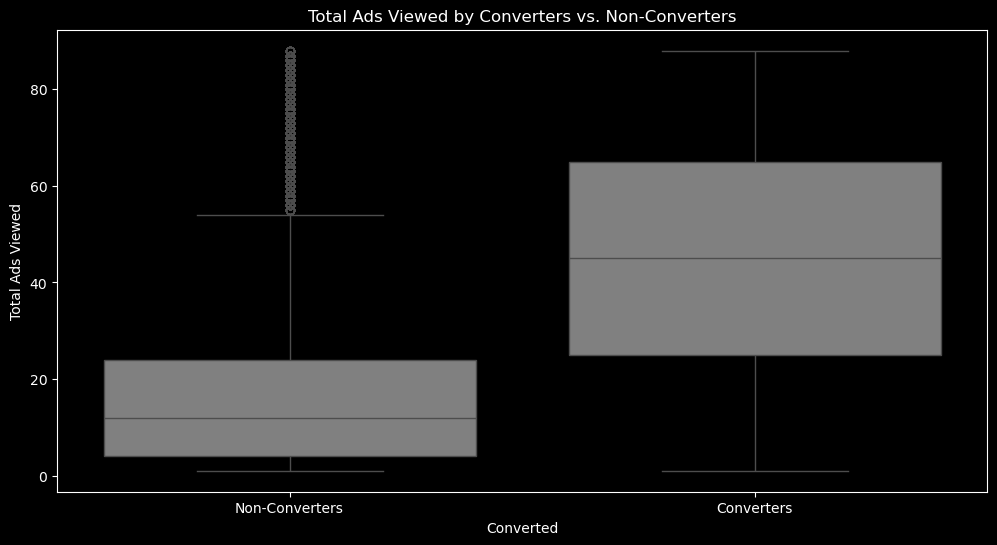

In [88]:
# Create a box plot for 'total ads' viewed by converters and non-converters
plt.figure(figsize=(12, 6))

# Calculate the 95th percentile to filter extreme outliers
percentile_95 = df['total ads'].quantile(0.95)

# Filter the data to include only values below the 95th percentile
filtered_data = df[df['total ads'] <= percentile_95]

# Side-by-side box plots
sns.boxplot(x='converted', y='total ads', data=filtered_data, color = 'grey')

# Set titles and labels
plt.title('Total Ads Viewed by Converters vs. Non-Converters')
plt.xlabel('Converted')
plt.ylabel('Total Ads Viewed')
plt.xticks([0, 1], ['Non-Converters', 'Converters'])

# Show the plot
plt.show()

Based on the box plot you provided, which compares the number of ads viewed by converters and non-converters (after removing the top 5% of extreme outliers):

- The median number of ads viewed by converters is notably higher than that of non-converters, which suggests that users who convert tend to be exposed to more ads on average.suggesting that users who convert tend to be exposed to more ads.
- The interquartile range (IQR) for converters is much wider than for non-converters, indicating greater variability in the number of ads viewed. This suggests that while some converters were exposed to a moderate number of ads, others viewed significantly more.
- The overall distribution shows that converters generally viewed more ads, and the spread is more significant, indicating that higher ad exposure is more common among those who convert.
- Even after removing the 95th percentile of outliers, the box plot for non-converters still shows some outliers. This indicates that there are non-converters who were exposed to a high number of ads but did not convert. This could suggest potential ad fatigue or ineffective ad content for this group.

As the descriptive statistics and box plots indicated, both groups (converters and non-converters) do not follow a normal distribution. This violation of the normality assumption makes the use of the t-Test inappropriate for this comparison. Instead, we will proceed with the Mann-Whitney U Test, which is a non-parametric test and does not require the data to be normally distributed.

The Mann-Whitney U Test will allow us to compare the distribution of the number of ads viewed between the two groups:

In [89]:
# Mann-Whitney U Test
stat, p_value = mannwhitneyu(df['total ads'][df['converted'] == True],
                             df['total ads'][df['converted'] == False])
print('Mann-Whitney U Test: p-value =', p_value)

Mann-Whitney U Test: p-value = 0.0


The p-value of 0.0 means that the difference between the two groups is statistically significant at any conventional significance level (0.05 or 0.01). This suggests that the number of ads viewed is meaningfully different between users who convert and those who do not. Given the statistical significance, it suggests that ad exposure plays a significant role in influencing conversion rates. Users who convert tend to view more ads than those who don't.  

### Identifying the Optimal Number of Ads for Conversion

While the Mann-Whitney U Test confirms a significant difference in ad exposure between converters and non-converters, it does not tell us the optimal number of ads to maximize conversion rates without causing ad fatigue. To explore this, we can segment users based on their ad exposure and analyze the conversion rate for each segment.

We segment users into different groups based on the number of ads they have viewed and then calculate and visualize the conversion rate for each segment:

C:\Users\Al-Amin\AppData\Local\Temp\ipykernel_47016\1821082607.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rate_by_group = df.groupby('ad_exposure_group')['converted'].mean() * 100
C:\Users\Al-Amin\AppData\Local\Temp\ipykernel_47016\1821082607.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_count_by_group = df.groupby('ad_exposure_group')['converted'].count()


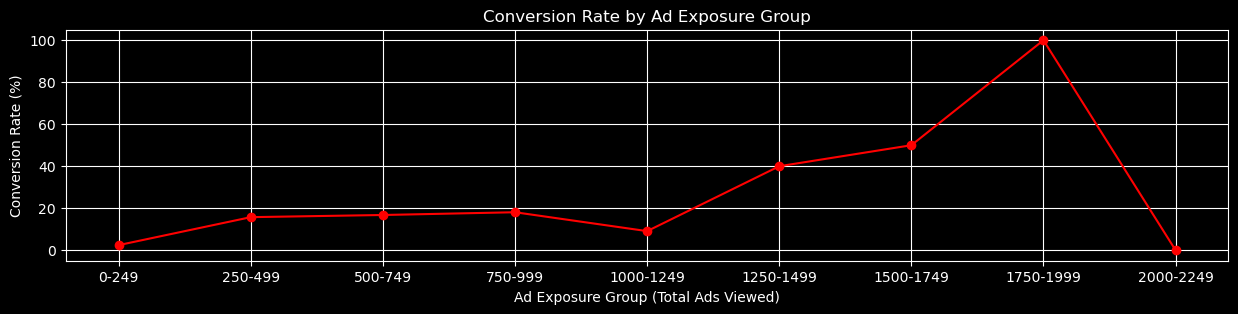

In [92]:
# Determine the maximum value of 'total ads'
max_ads = df['total ads'].max()

# Define bins for segmenting the users based on the number of ads viewed
bin_size = 250
bins = np.arange(0, max_ads + bin_size, bin_size)  # Bins from 0 to max_ads with equal bin size
labels = [f'{i}-{i+bin_size-1}' for i in range(0, int(max_ads), bin_size)]

# Segment users based on the number of ads viewed
df['ad_exposure_group'] = pd.cut(df['total ads'], bins=bins, labels=labels, right=False)

# Calculate the conversion rate for each ad exposure group
conversion_rate_by_group = df.groupby('ad_exposure_group')['converted'].mean() * 100

# Count the number of users in each group for context
user_count_by_group = df.groupby('ad_exposure_group')['converted'].count()

# Plot the conversion rates against the number of ads viewed
plt.figure(figsize=(15, 3))
plt.plot(conversion_rate_by_group.index, conversion_rate_by_group.values, marker='o', color = 'red')
plt.title('Conversion Rate by Ad Exposure Group')
plt.xlabel('Ad Exposure Group (Total Ads Viewed)')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.show()

In [93]:
conversion_user_by_ad_exposure = pd.concat([conversion_rate_by_group, user_count_by_group], axis=1).round(2)
conversion_user_by_ad_exposure.columns = ['Conversion Rate', 'User Count']
conversion_user_by_ad_exposure

,Conversion Rate,User Count
ad_exposure_group,,
0-249,2.44,584464
250-499,15.75,3048
500-749,16.78,459
750-999,18.09,94
1000-1249,9.09,22
1250-1499,40.00,10
1500-1749,50.00,2
1750-1999,100.00,1
2000-2249,0.00,1


- Conversion rates increase significantly from 2.44% for 0-249 ads to 18.09% for 750-999 ads. This might suggests that higher ad exposure generally correlates with higher conversion rates up to this range.
- While this range seems optimal for driving conversions without overexposure, we should be cautios with high exposure results since the number of user drops expotentially as ad exposure gets higher.

### Accounting for Variability in User Segments: Weighted Conversion Rates and Confidence Intervals

When the number of users in each segment varies significantly, it can lead to misleading conclusions if not properly accounted for. A more robust approach to interpreting these results involves normalizing or weighting the conversion rates by the number of users in each segment: When the number of users in each ad exposure segment varies significantly, it can lead to misleading conclusions if not properly accounted for. To address this, we use a more robust approach by:

1. Calculating a weighted average conversion rate that accounts for the different sample sizes in each segment.
2. Calculating 95% confidence intervals for the conversion rates in each segment, providing a range in which the true conversion rate is likely to fall.

C:\Users\Al-Amin\AppData\Local\Temp\ipykernel_47016\1641874202.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  confidence_intervals = df.groupby('ad_exposure_group').apply(
C:\Users\Al-Amin\AppData\Local\Temp\ipykernel_47016\1641874202.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  confidence_intervals = df.groupby('ad_exposure_group').apply(


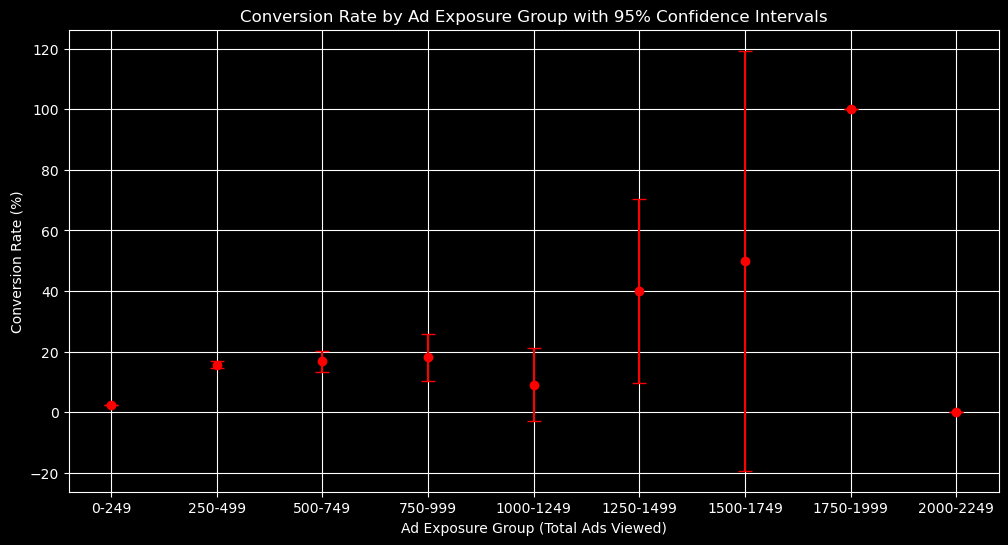

,Conversion Rate,Confidence Interval
ad_exposure_group,,
0-249,2.44,0.04
250-499,15.75,1.29
500-749,16.78,3.42
750-999,18.09,7.78
1000-1249,9.09,12.01
1250-1499,40.00,30.36
1500-1749,50.00,69.30
1750-1999,100.00,0.00
2000-2249,0.00,0.00


In [95]:
# Function to calculate confidence intervals
def calculate_confidence_interval(count, nobs, alpha=0.05):
    proportion = count / nobs
    z = norm.ppf(1 - alpha / 2)
    margin_of_error = z * np.sqrt((proportion * (1 - proportion)) / nobs)
    return proportion * 100, margin_of_error * 100

# Calculate conversion rates and confidence intervals for each segment
confidence_intervals = df.groupby('ad_exposure_group').apply(
    lambda x: calculate_confidence_interval(x['converted'].sum(), x['converted'].count())
)

# Extract conversion rates and confidence intervals
conversion_rates = confidence_intervals.apply(lambda x: x[0])
confidence_margin = confidence_intervals.apply(lambda x: x[1])

# Plot the conversion rates with confidence intervals
plt.figure(figsize=(12, 6))
plt.errorbar(conversion_rates.index, conversion_rates.values, yerr=confidence_margin.values, fmt='o', capsize=5, color = 'red')
plt.title('Conversion Rate by Ad Exposure Group with 95% Confidence Intervals')
plt.xlabel('Ad Exposure Group (Total Ads Viewed)')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.show()

conversion_rates, confidence_margin

conversion_rates_with_confidence = pd.concat([conversion_rates, confidence_margin], axis=1).round(2)
conversion_rates_with_confidence.columns = ['Conversion Rate', 'Confidence Interval']
conversion_rates_with_confidence

- Conversion rates increase significantly from 2.44% in the 0-249 ads group to 18.09% in the 750-999 ads group. This range provides the most reliable data, as indicated by the relatively narrow confidence intervals. This suggests that the 250-749 ads range is optimal for driving conversions while maintaining data reliability.
- However, higher exposure groups (above 750 ads) show wide variability in conversion rates, with some small segments displaying exceptionally high rates but with large confidence intervals. These wide confidence indicate less reliability.
- Therefore, while increased ad exposure generally correlates with higher conversions, the most effective and reliable strategy is to focus on the 250-749 ads range. This range not only shows a high conversion rate but also has narrower confidence intervals, indicating that the observed rates are more likely to be accurate and consistent.

## Conclusion 

**Overall Insights**

Through our analysis of the marketing campaign data, several key insights have emerged:

1. Ad Exposure and Effectiveness:

- AD vs. PSA: The analysis shows that the advertisements (AD) were more effective in driving conversions than the public service announcements (PSA). This indicates that the ads had a more substantial impact on getting users to make purchases. However, since the majority of users saw the ads, this imbalance could influence the results, so the differences should be interpreted with some caution.
- Increased Ad Exposure Correlates with Higher Conversions: Users who viewed more ads were generally more likely to convert. This suggests that repeated exposure to ads plays an important role in encouraging users to buy.
- Optimal Ad Exposure Range: On the other hand, showing users between 250 and 749 ads seems to be the sweet spot for prompting purchases without overwhelming them.

2. Optimal Campaign Timing:

- Best Day for Campaigns: Monday consistently outperformed other days, showing the highest conversion rates across multiple analyses. This suggests that users are more likely to engage and convert at the beginning of the week, possibly due to feeling refreshed or motivated after the weekend.
- Best Hour for Campaigns: The analysis identified 16:00 as a particularly strong hour for conversions. However, other hours in the late afternoon and early evening (14:00-20:00) also demonstrated solid performance, providing some flexibility in campaign scheduling.
- Day-Hour Interaction Reveals Nuanced Insights: While Monday at 16:00 is an effective time for campaigns, Saturday at 05:00 also showed a surprisingly high conversion rate. However, when comparing day-hour combinations, no single pair stood out as significantly better than others.hted with the highest-conversion rate. On the other hand, statistically speaking, no day-hour combination suggest significant difference in terms of conversion rates.

**Addressing the Key Questions**

1. Will the campaign be successful?

The findings suggest that the campaign is likely to be successful if it is carefully planned. By focusing ads on the right days and times and ensuring that users see an optimal number of ads, the campaign can achieve significant results.

2. If successful, how much of that success can be attributed to the ads?

The analysis indicates that the ads significantly contributed to the campaign's success. Ads were more effective at driving purchases compared to PSAs, especially when shown at the right times and in the right quantities.

**Actionable Recommendations**

1. Focus Campaigns on Mondays: Concentrate a significant portion of the ad budget on Mondays, particularly during the late afternoon. This day has consistently shown higher conversion rates, making it the most effective day for campaigns.

2. Leverage Late Afternoon and Early Evening Hours: Prioritize running ads during the 14:00-20:00 time window, with a particular emphasis on 16:00. This period consistently showed high conversion rates.

3. Optimize Ad Exposure: Aim to expose users to between 250 and 749 ads. This range has been identified as optimal for maximizing conversions without causing ad fatigue. Carefully monitor users who exceed this range to avoid diminishing returns.

4. Consider Day-Specific Optimization: Tailor ad campaigns to the best time for each day, ensuring that ads reach users when they are most likely to engage and convert.

**Limitations**

1. Data Constraints: The analysis was limited to the variables available in the dataset. Factors like user demographics, ad content quality, and external influences (e.g., seasonality or promotions) are missing, potentially limiting the depth of the analysis.

2. Imbalance in Group Sizes: Most users were shown ads, while only a few saw the PSAs. This imbalance could influence the results and suggests that the findings should be interpreted with care.

3. Assumption of Consistency: The analysis assumes consistent user behavior and campaign effectiveness throughout the dataset. Changes in user behavior over time, or differences in ad content quality, may have introduced variability not accounted for.

4. Variation in User Engagement: Some users saw significantly more ads than others, which could skew the results. While this was accounted for as much as possible, it’s still important to be cautious when drawing conclusions.

**Final Thoughts**

This study provides clear insights into the timing and exposure strategies that can make a marketing campaign more effective. Ads are likely to play a crucial role in driving success, particularly when they are well-timed and shown in optimal quantities.

Further analysis with more diverse data could help deepen the understanding of other factors that influence campaign success and refine these recommendations even further.